In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

# Data Visualization

In [12]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

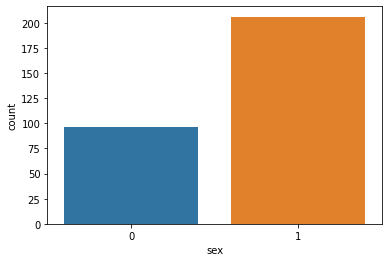

In [13]:
sns.countplot(data=df,x='sex')
plt.show()

People having gender 1 is more than twice of gender 0

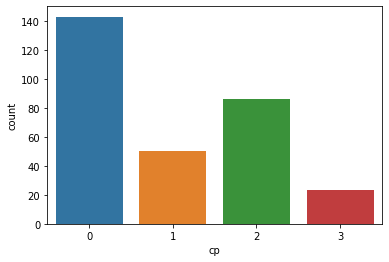

In [14]:
sns.countplot(data=df,x='cp')
plt.show()

People having chest pain of type 0 is the highest and 50% of total people in dataset - Typical Angina

people having chest pain of type 3 is the lowest - Asymptomatic

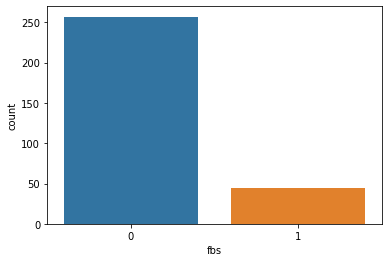

In [15]:
p = sns.countplot(data=df, x="fbs")
plt.show()

FBS with value 0 is higher than 1

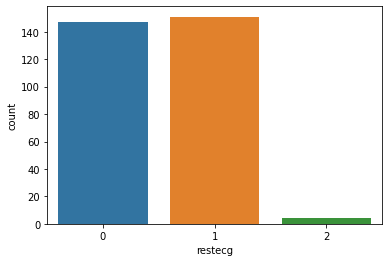

In [16]:
p = sns.countplot(data=df, x="restecg")
plt.show()

ECG for type 0 and 1 is almost equal
but for type 2 is negligible in comparision to type 0 and 1.

<Figure size 720x720 with 0 Axes>

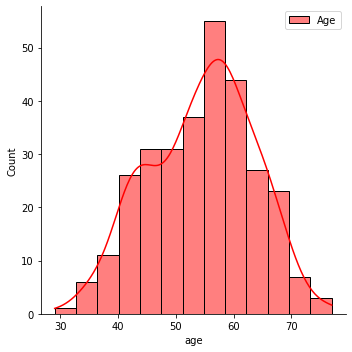

In [17]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color="red", label="Age", kde= True)
plt.legend()

Highest age group density is 55 to 60

 Heart Attack vs Age

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


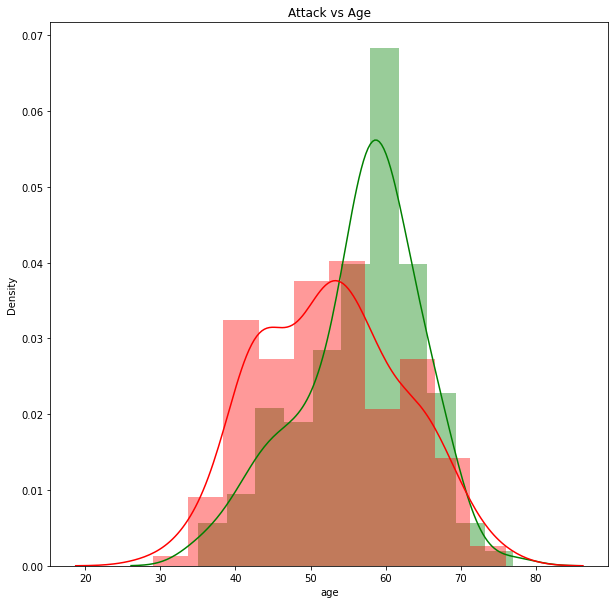

In [18]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(df[df['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack vs Age')
plt.show()

# Preprocessing

In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x = df.drop('output',axis=1)

In [21]:
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = df['output']

In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [26]:
train_data

array([[-1.30504994, -1.4186261 ,  0.98544689, ..., -0.61492051,
        -0.70674006, -0.49876142],
       [ 1.25925059, -1.4186261 ,  0.98544689, ..., -0.61492051,
         0.29516791, -0.49876142],
       [ 0.36731998,  0.70490738,  0.98544689, ...,  0.99590387,
        -0.70674006, -0.49876142],
       ...,
       [ 0.14433732,  0.70490738,  1.94307874, ..., -0.61492051,
        -0.70674006,  1.1478345 ],
       [-0.85908463,  0.70490738,  0.98544689, ...,  0.99590387,
        -0.70674006, -0.49876142],
       [ 0.36731998,  0.70490738,  0.98544689, ...,  0.99590387,
         1.29707587,  1.1478345 ]])

In [27]:
test_data

array([[ 0.81328528,  0.70490738,  0.02781503, -0.67462818,  0.65089023,
        -0.40527917, -0.97525383, -1.96657306, -0.6983225 ,  0.27236593,
        -0.61492051,  0.29516791,  1.1478345 ],
       [ 1.03626794,  0.70490738,  1.94307874,  2.19385084, -0.36856884,
        -0.40527917, -0.97525383,  0.23525787, -0.6983225 , -0.39657867,
        -0.61492051, -0.70674006,  1.1478345 ],
       [ 1.03626794,  0.70490738,  0.98544689, -0.38778028,  1.17949864,
        -0.40527917,  0.90503556, -0.78097179,  1.43200311,  0.60683823,
        -0.61492051, -0.70674006,  1.1478345 ],
       [ 0.36731998,  0.70490738, -0.92981682,  1.04645923,  0.44322264,
        -0.40527917, -0.97525383, -1.62782984,  1.43200311, -0.22934252,
         0.99590387, -0.70674006,  1.1478345 ],
       [ 0.81328528,  0.70490738,  0.98544689, -0.10093237, -0.29305336,
        -0.40527917,  0.90503556, -0.14582825, -0.6983225 ,  0.60683823,
        -0.61492051,  2.29898383,  1.1478345 ],
       [ 0.14433732, -1.418626

# Model

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(train_data, train_target)

LogisticRegression()

In [30]:
pred = model.predict(test_data)
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_target,pred)

In [31]:
acc

0.8688524590163934

# Support Vector Machine

In [32]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data,train_target)

SVC()

In [33]:
cpred = clf.predict(test_data)
acc2 = accuracy_score(test_target,cpred)
acc2

0.9344262295081968

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(max_depth=2, random_state=0)
rc.fit(train_data,train_target)
predrc = rc.predict(test_data)
acc3 = accuracy_score(test_target,predrc)
acc3

0.8852459016393442

 Support Vector Machine is Best with 93 Accurracy

In [35]:
threshold=0.5
from sklearn.metrics import confusion_matrix
y_pred = (clf.predict(test_data)>=threshold).astype(int)
cms = confusion_matrix(test_target,y_pred)
print(cms)

[[26  1]
 [ 3 31]]


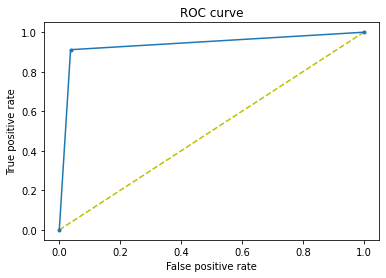

In [36]:
from sklearn.metrics import roc_curve
y_preds = clf.predict(test_data).ravel()

fpr, tpr, thresholds = roc_curve(test_target, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [37]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9373638344226579
